# Looking for opportunities. Exchange rates analysis during military operations. 

In this project I'd like to investigate how does the armed international conflicts affect currency exchange rates at the begining phase of conflict and find out is there way to earn money during that period.

> As a disclaimer: it is true, that every crisis is unique and we can not predict precisely how the economy will go through. There are number of factors affecting the situation. We can try to find patterns which will help to preserve personal savings and may be even earn money.

I will decompose the task in following subtasks:

1. Dataset introduction and cleaning.

2. Initial exploration.
 
    `How does the exchange rates were changing during first monthes of war conflict in Chechen Republic 2001, Iraq 2003, Georgia 2008, Libya 2011, Ukraine 2014`?
    
    `Is there any pattern that currency exchange rate time series follow during conflicts?`

    `To find the most suitable conflicts for future analysis`

3. Mathematical analysis.

    `Is there correlation between RUB, USD and YUAN curencies exchange rates during conflicts?`

4. Close look.

    `RUB` to `EURO` exchange rate during first year after Russia - Georgia conflict from 2008.

    `Can this experience be applyed today?`

5. Conclusion.

    `Can experience be applied to predict exchange rates dynamic in future conflicts?`

## 1. Dataset introduction and cleaning

In [2]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt 
import matplotlib.style as style

# reading the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

# explore dataset
exchange_rates.info()
#exchange_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6068 non-null   object 
 1   [Australian dollar ]      6068 non-null   object 
 2   [Bulgarian lev ]          5666 non-null   object 
 3   [Brazilian real ]         5800 non-null   object 
 4   [Canadian dollar ]        6068 non-null   object 
 5   [Swiss franc ]            6068 non-null   object 
 6   [Chinese yuan renminbi ]  5800 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6068 non-null   object 
 9   [Danish krone ]           6068 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6068 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6068 non-null   object 
 14  [Croatia

Dataset consist of 40 columns and 6068 rows. First column is date when the qurecy exchange data was equired, the rest of the columns represent curencies. First entry is from 4th of January 2022 and the last one is from 15th of June. Some of the values are missing. Explanation for those missing values is given on dataset description on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020):
> Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009)

This explanation doesn't cover `Russian rouble` missing values. Later I will give explanation to that.

## Cleaning Dataset

In [3]:
# to give columns readable and tipe-friendlt format
exchange_rates.rename(columns={'[US dollar ]': 'USD',
                               'Period\\Unit:': 'Time',
                               '[Russian rouble ]': 'RUB',
                               '[Chinese yuan renminbi ]': 'YUAN'},
                      inplace=True)
# to convert date column to datetime format
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']).dt.date
# to verify that time series is in correct order
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
# to isolate dataframe of interest
euro_to = exchange_rates.loc[:,['Time','USD','RUB','YUAN']]

Interesting that both `USD` and `RUB` columns have the same amount of missing `"-"` values. Those we need do discard from our dataset. Probably that is the days when rate was not determined.

In [4]:
# remove missing values. Days with '-' in cell are same for all columns and are likely to be hollydays, when exchange rate was not determined.
# euro_to.dropna(inplace=True)
euro_to = euro_to[euro_to['USD']!='-'].copy()
# convert USD and RUB columns to float dtype
euro_to['USD'] = euro_to['USD'].astype(float)
euro_to['RUB'] = euro_to['RUB'].astype(float)
euro_to['YUAN'] = euro_to['YUAN'].astype(float)

## 2. Initial exploration

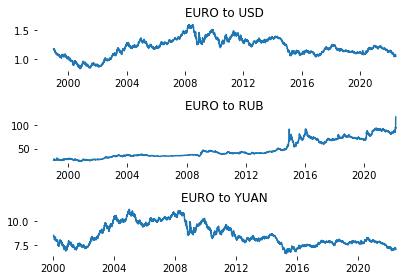

In [5]:
# first - plot exchange rates for three currencies to have first impression
fig, (USD,RUB,YUAN) = plt.subplots(ncols=1, nrows=3)
for ax, coin in zip([USD,RUB,YUAN],['USD','RUB','YUAN']):
    fig.tight_layout()
    ax.plot(euro_to['Time'], euro_to[coin])
    ax.set_title('EURO to '+coin)
    ax.spines[['top','bottom','left','right']].set_visible(False)
plt.show()

Quick reference to line plots shows shows that YUAN and USD have similar pattern, while RUB is completly different. Known fact that YUAN rate is determined by chinese government and as US is the main economy of the world and likely the largest market for china - China is interested in having ballance with USD. RUB plot have right skew with surges exactly in 2008 and 2014, while economic sanctions were implemented. 

**Next step. I will create dataframes for first three monthes of war conflicts of interest.**

In [6]:
# 2n Chechen war. Officially the beggining of war concidered to be 7th of august, but Russia sent troops in september. 
# Period of interest is 1st of September - 1st of December 1999
chechen = euro_to[euro_to['Time'].between(dt.datetime(1999,9,1).date(), dt.datetime(1999,12,1).date())].copy()
# NATO invasion to Iraq.
# PEriod of interest is 15th of March - 15th of June 2003
iraq = euro_to[euro_to['Time'].between(dt.datetime(2003,3,15).date(), dt.datetime(2003,6,15).date())].copy()
# Military operation in Georgia 2008. Despite the intens armed conflict lasted for only 5 days the economical impact was significant to Russia.
# Period of interest is 1st of August - 1st of 1st of November 2008
georgia = euro_to[euro_to['Time'].between(dt.datetime(2008,8,1).date(), dt.datetime(2008,11,1).date())].copy()
# NATO invasion to Libya
# Period of interest 15th of March - 15th of June 2011
libya = euro_to[euro_to['Time'].between(dt.datetime(2011,3,15).date(), dt.datetime(2011,6,15).date())].copy()
# Russian invasion to Ukraine 
# Period of interest 1st of April - 1st of July 2014
ukraine = euro_to[euro_to['Time'].between(dt.datetime(2014,4,1).date(), dt.datetime(2014,7,1).date())].copy()
# 2nd Russian invasion to Ukraine
# Period of interest 20th of February - 20th May 2022
ukraine_2022 = euro_to[euro_to['Time'].between(dt.datetime(2022,2,20).date(), dt.datetime(2022,5,20).date())].copy()

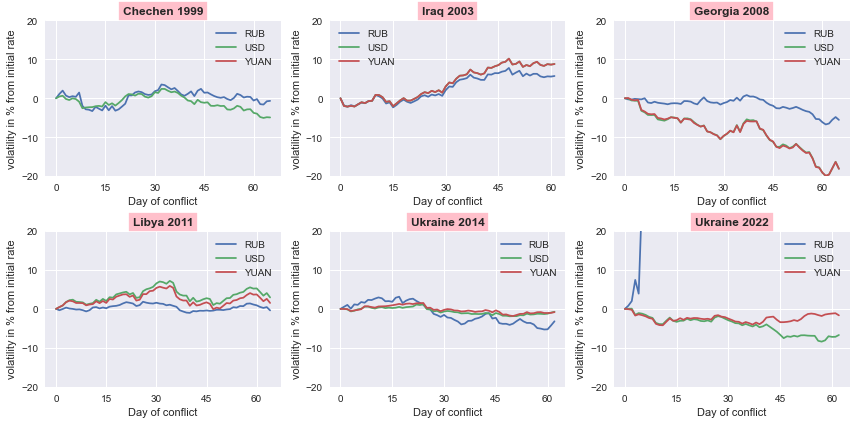

In [102]:
wars = (chechen, iraq, georgia, libya, ukraine, ukraine_2022)
naming = ['Chechen 1999', 'Iraq 2003', 'Georgia 2008', 'Libya 2011', 'Ukraine 2014', 'Ukraine 2022']
for war, name in zip(wars, naming):
    war.reset_index(drop=True, inplace=True)
    war['RUB_volatility'] = round(((war['RUB'] - war.iloc[0, 2])/war.iloc[0, 2])*100, 2)
    war['USD_volatility'] = round(((war['USD'] - war.iloc[0, 1])/war.iloc[0, 1])*100, 2)
    war['YUAN_volatility'] = round(((war['YUAN'] - war.iloc[0, 3])/war.iloc[0, 3])*100, 2)

plt.figure(figsize=(12,6))
style.use('seaborn')
for war,name,i in zip(wars,naming,range(1,7)):
    plt.tight_layout()
    plt.subplot(2,3,i)
    plt.plot(war['RUB_volatility'], label='RUB')
    plt.plot(war['USD_volatility'], label='USD')
    plt.plot(war['YUAN_volatility'], label='YUAN')
    plt.legend()
    plt.xticks([0,15,30,45,60])
    plt.ylabel('volatility in % from initial rate')
    plt.xlabel('Day of conflict')
    plt.ylim(-20,20)
    plt.title(name, backgroundcolor='pink',weight='bold',fontsize=12)
plt.show()

During first monthes of conflicts USD, RUB and YUAN are following approximately the same pattern. The only distinct difference is latest Russian invasion to Ukrain, where significant surge is observable.

    Graph needs some explanation. To be able to compare volatility I had to plot percentages of change in respect to initial currency rate. Inintial rate is the rate at the very start of the conflict.

    How to read plots? Let's have a look on the last graph. We see that `RUB` plot line goes rapidely up. Each day coast of 1 euro goes higher and higher, which means that `RUB` is weakening.

War is drama for economy as uncertainty raises and panic as well, especially for countries involved in conflict. Since economy in our days is global - war on one end of the Earth affects life on other end. That is the probable reason for currency exchange rates to have similar patterns.

Nevertheless the patterns are similar plots have different skew in different conflicts. For example `Chechen, Libya and Ukraine 2014` conflicts didn't affect currency rate equality. Graphs are almost stable. During `Iraq` conflict `USD, RUB and YUAN` have left skew. During conflict in Georgia there is right skew.

The last invasion to Ukraine has as consiquence partial isolation of Russia from global economy. Since that is happening there is no opportunity do determine actual value of RUB. Inside of russia there is one rate, outside is different. Which one to be considered as actual one - question without answer. That is why RUB rate is no longer determined by ECB.

**Intermediate conclusion**

1. There is no specific pattern which currency exhchange rates follow during different conflicts;
2. Currency rates are following similar pattern in respect to EURO. The only excrption is last conflict, when russia was isolated from global economy.  

## 3. Mathematical analisys

In this section I will evaluate correlation between `USD` and `RUB` exchange rates. There is no need to investigate correlation between `YUAN` and `USD`. It is obvious from the graph, that correlation is close to 1.

For evaluation I will use `Chechen, Georgia and Ukraine 2014` dataframes.

In [8]:
# Dataframes of interest
wars = [chechen, georgia, ukraine]
titles = ['Chechen Republic 1999','Georgia 2008', 'Ukraine 2014'] 

# Evaluating correlation between USD and RUB rates
corr = []
for war, title in zip(wars,titles):
    corr_value = "Pearson's R = "+ str(round(war['USD'].corr(war['RUB']),2))    # assignin value as string to be able to print it later on scatterplot
    corr.append(corr_value)                                                     # to be able to use later on scatterplot
    print(corr_value + ' during war in ' + title)                               # printing for assesment

Pearson's R = 0.61 during war in Chechen Republic 1999
Pearson's R = 0.89 during war in Georgia 2008
Pearson's R = 0.89 during war in Ukraine 2014


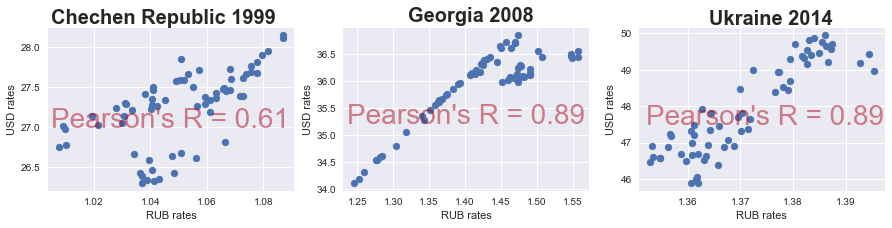

In [9]:
# Correlation visualisation on scatterplots
fig, (Chechen, Georgia, Ukraine) = plt.subplots(nrows=1,ncols=3,figsize=(15,3))
axes = [Chechen, Georgia, Ukraine]
for ax, war in zip(axes, wars):
    ax.scatter(war['USD'], war['RUB'])
    ax.set_xlabel('RUB rates')
    ax.set_ylabel('USD rates')

# Brushing the graphs appearance 
Chechen.text(x=1.005,y=27, s=corr[0], fontsize=28, color='#af0b1e', alpha=0.5) 
Chechen.text(x=1.005,y=28.3,s=titles[0], fontsize=20, weight='bold')
Georgia.text(x=1.235,y=35.2, s=corr[1], fontsize=28, color='#af0b1e', alpha=0.5) 
Georgia.text(x=1.32,y=37.1,s=titles[1], fontsize=20, weight='bold')
Ukraine.text(x=1.352,y=47.5, s=corr[2], fontsize=28, color='#af0b1e', alpha=0.5) 
Ukraine.text(x=1.364,y=50.23,s=titles[2], fontsize=20, weight='bold')
plt.show()

**Intermediate conclusion**

1. Correlation values between `USD` and `RUB` for all latest conflicts with Russia involved are positive. `The higher USD rate, the higher RUB's rate, and opposite`;
2. Correlation is strong - up to `0.89` in latest conflicts (Ukraine 2022 not taken into account).

# 4. Close look.

## `RUB` to `EURO` exchange rate during first year after Russia - Georgia conflict from 2008.

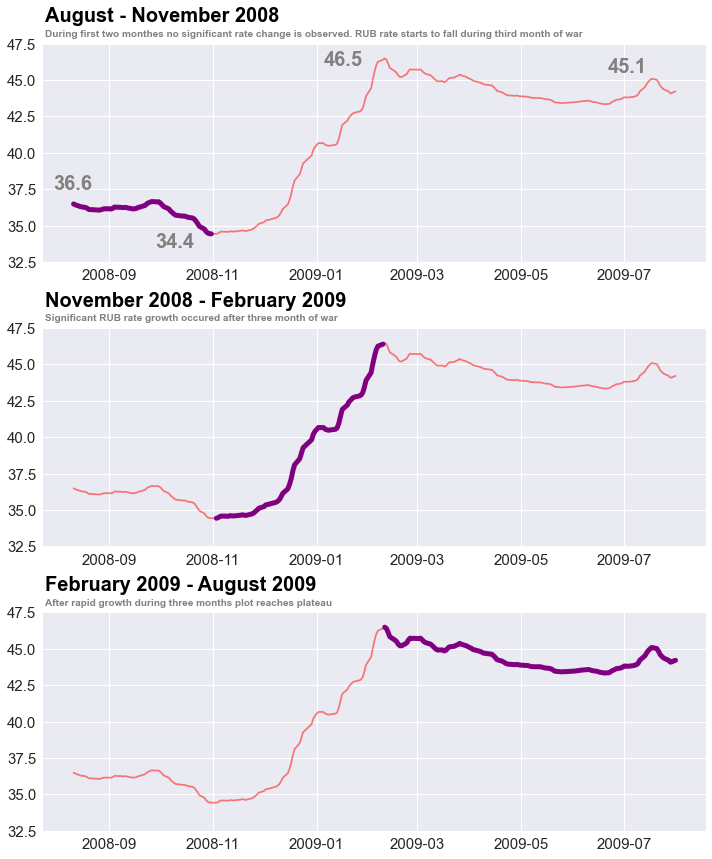

In [93]:
# isolating dataframe for first year after Georaga 2008 conflict
year_after_georgia = euro_to.loc[euro_to['Time'].between(dt.datetime(2008,8,1).date(), dt.datetime(2009,8,1).date())][['Time', 'RUB']]
year_after_georgia.reset_index(drop=True, inplace=True)

# bring Time to friendly appearance
year_after_georgia['Time'] = pd.to_datetime(year_after_georgia['Time'])

# bring rate walues to weekly average value to avoid factuations on graph
year_after_georgia['weekly_avg'] = year_after_georgia['RUB'].rolling(7).mean()

# plot three the timeseries in sungle figure for storytelling graph 
fig, (fall, growth, plateau) = plt.subplots(ncols=1, nrows=3, figsize = (10,12))
axes = [fall,growth,plateau]
for ax in axes:
    ax.plot(year_after_georgia['Time'],year_after_georgia['weekly_avg'], alpha=0.5, color='red')
    ax.tick_params(axis='both',labelsize=15)
    ax.set_ylim(bottom=32.5,top=47.5)

#adding title and subtitle to first graph
fall.text(x=14085,y=49,s='August - November 2008',size=20,weight='bold',color='black')
fall.text(x=14085,y=48,s='During first two monthes no significant rate change is observed. RUB rate starts to fall during third month of war',weight='bold',color='grey')

# addind info on figure 1
fall.text(x=14090, y=37.5, s='36.6', fontsize=20, color='grey', weight='bold')
fall.text(x=14150, y=33.5, s='34.4', fontsize=20, color='grey', weight='bold')
fall.text(x=14249, y=46, s='46.5', fontsize=20, color='grey', weight='bold')
fall.text(x=14416, y=45.5, s='45.1', fontsize=20, color='grey', weight='bold')
fall.plot(year_after_georgia['Time'][0:66],year_after_georgia['weekly_avg'][0:66], lw=5, color='purple')

#adding title and subtitle to second graph
growth.text(x=14085,y=49,s='November 2008 - February 2009',size=20,weight='bold',color='black')
growth.text(x=14085,y=48,s='Significant RUB rate growth occured after three month of war',weight='bold',color='grey')

# addind info on figure 2
growth.plot(year_after_georgia['Time'][66:134],year_after_georgia['weekly_avg'][66:134], lw=5, color='purple')

#adding title and subtitle to second graph
plateau.text(x=14085,y=49,s='February 2009 - August 2009',size=20,weight='bold',color='black')
plateau.text(x=14085,y=48,s='After rapid growth during three months plot reaches plateau',weight='bold',color='grey')

# addind info on figure 2
plateau.plot(year_after_georgia['Time'][134:],year_after_georgia['weekly_avg'][134:], lw=5, color='purple')

plt.tight_layout()
plt.show()

**intermediate conclusion**

1. Rate starts to change rapidly after three monthes after war begins. Probably that period used by global society to agree on sanctions to be applied;
2. Right after sanctions applied rate growth dramaticaly - up to 35% from initial value;
3. After first shock is passed RUb rate finds new equlibrium;
4. The only way to apply those findings - is to admit that sanctions affect Russian importing abilities. In other turn Russian budget continue to receive Euros as payments for oil and gas. As soon as new import/export equality is reached - growth stops and rate remains stable.

## 5. Conclusion

Throug the project 6 military crisises were investigated in respect of currency exchange rates. Followinf was found:

1. Every conflict should be considered as unique. There is no specific pattern which exchange rates follow;
2. `USD` and `YUAN` have strong correlation through the whole period of observation;
3. `RUB` rate is also correlates a lot with `USD` but situation changes dramaticaly after economical sanctions implemented. 